In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from utility import loadData
import math

### Load widefield data U,V,T


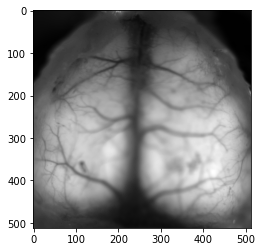

In [2]:
# expRoot = r"\\steinmetzsuper1.biostr.washington.edu\data\Subjects\ZYE_0060\2022-03-24\1"
expRoot = r"\\steinmetzsuper1.biostr.washington.edu\data\Subjects\ZYE_0012\2020-10-16\5"
(U,V,T,mimg) = loadData.loadUVt(expRoot)

plt.figure()
plt.imshow(mimg,cmap='gray') 
plt.show()  # display it

### select frames, filter and hilbert transform

In [ ]:
t_start = 1860
t_end = 1870
f_start = next((indx for indx,x in enumerate(T) if x > t_start), None)
f_end = next((indx for indx,x in enumerate(T) if x > t_end), None)
print(f_start, f_end)
U1 = U[:,:,:50]
V1 = V[f_start:f_end,:50].T
T1 = T[f_start:f_end]
dV1 =np.hstack((np.zeros_like(V1[:,0]).reshape(-1,1), np.diff(V1,axis=1)))
(filtered,amplitude_envelope,instantaneous_phase) = loadData.filter_and_hilbert(U1, dV1)

65008 65358


### pad zeros around phasemap

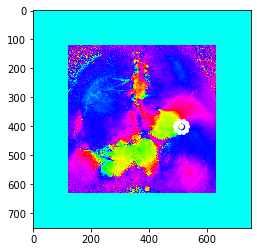

In [10]:
trace_phase = loadData.pad_zeros(instantaneous_phase, halfpadding =120)
th = np.arange(0,360,36)
r = 20
px = 510
py = 400
halfpadding =120
cx = np.round(r*np.cos(np.radians(th))+px).astype('int64')
cy = np.round(r*np.sin(np.radians(th))+py).astype('int64')
trace_phase = loadData.pad_zeros(instantaneous_phase, halfpadding)
plt.figure()
plt.imshow(trace_phase[:,:,199],cmap='hsv', interpolation= 'None',clim=[-np.pi,np.pi]) 
plt.scatter(510,400,s=16, c='w',marker = "o")
plt.scatter(cx,cy,s=16, c='w',marker = "o")
plt.show()  # display it

In [11]:
trace_phase1 = trace_phase[:,:,199]
th = np.arange(0,360,36)
spiral_range = np.linspace(-np.pi,np.pi,5)
px = 510; py = 400
rs = np.arange(10,21,5)
pw = [] 
spiral = np.empty([3, 4])
for indx,r in enumerate(rs):       
    spiral_temp = loadData.check_spiral(trace_phase1,px,py,r,th,spiral_range)
    spiral[indx,:] = spiral_temp
    
if np.sum(spiral[:,3])>=2:
    pw_temp = [px,py]
    pw.append(pw_temp) #append in list then convert to numpy is faster
    pw = np.asarray(pw)   

In [12]:
grid_size = 10;
x = np.arange((halfpadding+rs[0]+1),(trace_phase1.shape[0]-rs[0]-halfpadding),grid_size)
y = np.arange((halfpadding+rs[0]+1),(trace_phase1.shape[1]-rs[0]-halfpadding),grid_size)
xx,yy = np.meshgrid(x,y)

In [100]:
xx.size

2500

In [20]:
trace_phase1 = trace_phase[:,:,140]
xx  = xx.flatten()
yy = yy.flatten()
pw = [] 
for indx,x1 in enumerate(xx):
    px = xx[indx]; py = yy[indx]
    spiral = np.empty([3, 4])
    for indx,r in enumerate(rs):       
        spiral_temp = loadData.check_spiral(trace_phase1,px,py,r,th,spiral_range)
        spiral[indx,:] = spiral_temp
        
    if np.sum(spiral[:,3])>=2:
        pw_temp = [px,py]
        pw.append(pw_temp) #append in list then convert to numpy is faster
        
pw = np.asarray(pw)    

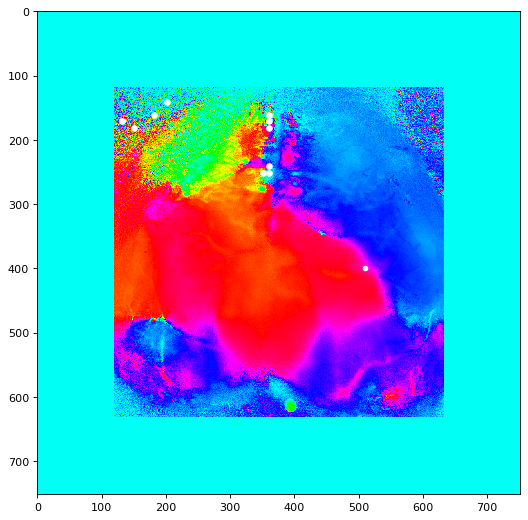

In [21]:
plt.figure(figsize=(8, 8), dpi=80)
plt.imshow(trace_phase[:,:,140],cmap='hsv', interpolation= 'None',clim=[-np.pi,np.pi]) 
plt.scatter(510,400,s=16, c='w',marker = "o")
plt.scatter(pw[:,0],pw[:,1],s=24, c='w',marker = "o")
plt.show()  # display it+
